Freeze Packages in requirement.txt

!pip freeze > requirement.txt





In [ ]:
!pip install -r requirement.txt

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,boxcox
from outlier import outlier_detection
from sklearn.preprocessing import Normalizer,StandardScaler

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Read Data

In [4]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [5]:
train.head()


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


## Data Discripancy

In [7]:
train.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [8]:
test.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
dtype: object

**No discripancies in data types**

### Missing Values

In [9]:
train.isna().sum()/train.shape[0]

id                      0.0
Gender                  0.0
Age                     0.0
Driving_License         0.0
Region_Code             0.0
Previously_Insured      0.0
Vehicle_Age             0.0
Vehicle_Damage          0.0
Annual_Premium          0.0
Policy_Sales_Channel    0.0
Vintage                 0.0
Response                0.0
dtype: float64

In [10]:
test.isna().sum()/test.shape[0]

id                      0.0
Gender                  0.0
Age                     0.0
Driving_License         0.0
Region_Code             0.0
Previously_Insured      0.0
Vehicle_Age             0.0
Vehicle_Damage          0.0
Annual_Premium          0.0
Policy_Sales_Channel    0.0
Vintage                 0.0
dtype: float64

### Data Quality Check 

In [11]:
train['Gender'].value_counts()/train.shape[0]

Male      0.540761
Female    0.459239
Name: Gender, dtype: float64

In [12]:
test['Gender'].value_counts()/test.shape[0]

Male      0.537135
Female    0.462865
Name: Gender, dtype: float64

In [13]:
train['Driving_License'].value_counts()/train.shape[0]

1    0.997869
0    0.002131
Name: Driving_License, dtype: float64

In [14]:
test['Driving_License'].value_counts()/test.shape[0]

1    0.998134
0    0.001866
Name: Driving_License, dtype: float64

In [15]:
train['Previously_Insured'].value_counts()/train.shape[0]

0    0.54179
1    0.45821
Name: Previously_Insured, dtype: float64

In [16]:
test['Previously_Insured'].value_counts()/test.shape[0]

0    0.539961
1    0.460039
Name: Previously_Insured, dtype: float64

In [17]:
train['Vehicle_Age'].value_counts()/train.shape[0]

1-2 Year     0.525613
< 1 Year     0.432385
> 2 Years    0.042001
Name: Vehicle_Age, dtype: float64

In [18]:
test['Vehicle_Age'].value_counts()/test.shape[0]

1-2 Year     0.525036
< 1 Year     0.433094
> 2 Years    0.041870
Name: Vehicle_Age, dtype: float64

In [19]:
train['Vehicle_Damage'].value_counts()/train.shape[0]

Yes    0.504877
No     0.495123
Name: Vehicle_Damage, dtype: float64

In [20]:
test['Vehicle_Damage'].value_counts()/test.shape[0]

Yes    0.502491
No     0.497509
Name: Vehicle_Damage, dtype: float64

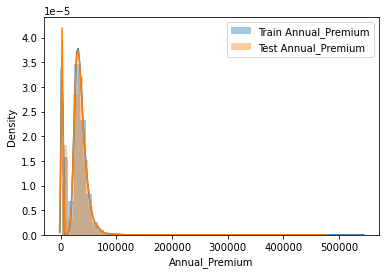

In [21]:
sns.distplot(train['Annual_Premium'],label='Train Annual_Premium')
sns.distplot(test['Annual_Premium'],label='Test Annual_Premium')
plt.legend()

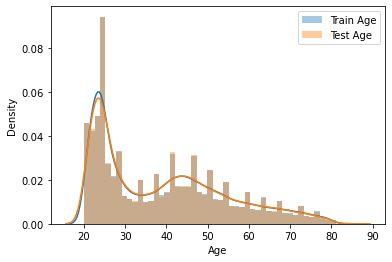

In [22]:
sns.distplot(train['Age'],label='Train Age')
sns.distplot(test['Age'],label='Test Age')
plt.legend()

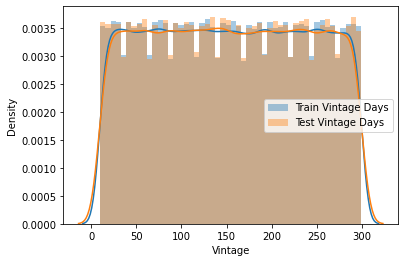

In [23]:
sns.distplot(train['Vintage'],label='Train Vintage Days')
sns.distplot(test['Vintage'],label='Test Vintage Days')
plt.legend()

### Outlier

{'whiskers': [<matplotlib.lines.Line2D at 0x1400f3a0f70>,
 'caps': [<matplotlib.lines.Line2D at 0x1400f3ae670>,
 'boxes': [<matplotlib.lines.Line2D at 0x1400f3a0c10>],
 'medians': [<matplotlib.lines.Line2D at 0x1400f3aed30>],
 'fliers': [<matplotlib.lines.Line2D at 0x1400f3b80d0>],
 'means': []}

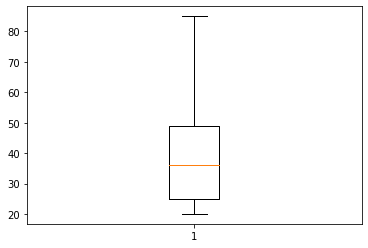

In [24]:
plt.boxplot(train['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1400f401970>,
 'caps': [<matplotlib.lines.Line2D at 0x1400f411070>,
 'boxes': [<matplotlib.lines.Line2D at 0x1400f401610>],
 'medians': [<matplotlib.lines.Line2D at 0x1400f411730>],
 'fliers': [<matplotlib.lines.Line2D at 0x1400f411a90>],
 'means': []}

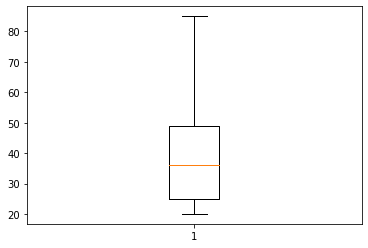

In [25]:
plt.boxplot(test['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1400f4663d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1400f466a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1400f466070>],
 'medians': [<matplotlib.lines.Line2D at 0x1400f474190>],
 'fliers': [<matplotlib.lines.Line2D at 0x1400f4744f0>],
 'means': []}

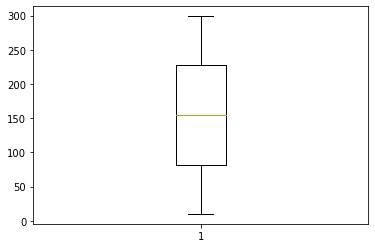

In [26]:
plt.boxplot(train['Vintage'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1400e7fd790>,
 'caps': [<matplotlib.lines.Line2D at 0x1400e8dec10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1400e877610>],
 'medians': [<matplotlib.lines.Line2D at 0x1400e859970>],
 'fliers': [<matplotlib.lines.Line2D at 0x1400e867b80>],
 'means': []}

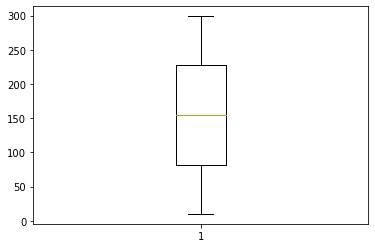

In [27]:
plt.boxplot(test['Vintage'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1400f372b20>,
 'caps': [<matplotlib.lines.Line2D at 0x1400f3d1be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1400f3721f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1400e78da30>],
 'fliers': [<matplotlib.lines.Line2D at 0x1400e83a550>],
 'means': []}

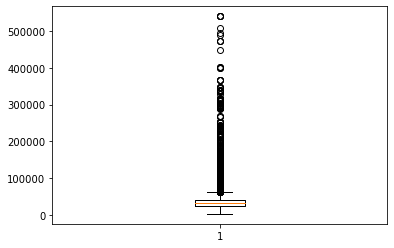

In [28]:
plt.boxplot(train['Annual_Premium'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1400f55b490>,
 'caps': [<matplotlib.lines.Line2D at 0x1400f55bb50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1400f55b130>],
 'medians': [<matplotlib.lines.Line2D at 0x1400f568250>],
 'fliers': [<matplotlib.lines.Line2D at 0x1400f5685b0>],
 'means': []}

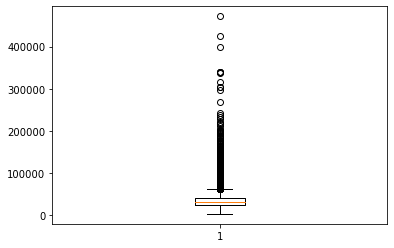

In [29]:
plt.boxplot(test['Annual_Premium'])

In [30]:
train.Age.

Object `clip` not found.


In [ ]:
train['Age'].clip

In [32]:
outlier_detection(df=train,col='Annual_Premium')

{'whiskers': [<matplotlib.lines.Line2D at 0x14017757640>,
 'caps': [<matplotlib.lines.Line2D at 0x14017757be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x14017720130>],
 'medians': [<matplotlib.lines.Line2D at 0x14017a82f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x14017a82a90>],
 'means': []}

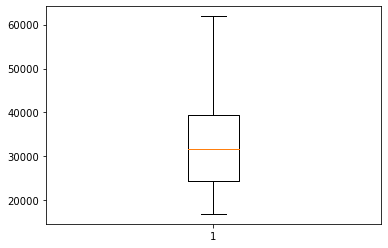

In [33]:
plt.boxplot(train['Annual_Premium'])

In [34]:
outlier_detection(df=test,col='Annual_Premium')

{'whiskers': [<matplotlib.lines.Line2D at 0x1401387bd60>,
 'caps': [<matplotlib.lines.Line2D at 0x1401387b310>,
 'boxes': [<matplotlib.lines.Line2D at 0x1401387b040>],
 'medians': [<matplotlib.lines.Line2D at 0x140173b4280>],
 'fliers': [<matplotlib.lines.Line2D at 0x140173b4c40>],
 'means': []}

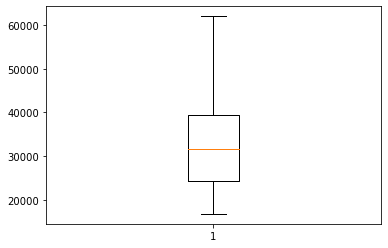

In [35]:
plt.boxplot(test['Annual_Premium'])

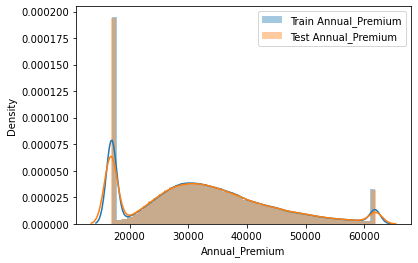

In [36]:
sns.distplot(train['Annual_Premium'],label='Train Annual_Premium')
sns.distplot(test['Annual_Premium'],label='Test Annual_Premium')
plt.legend()

In [39]:
train['Response'].value_counts()/train.shape[0]

0    0.877437
1    0.122563
Name: Response, dtype: float64

## Explore Data

In [43]:
pd.crosstab(train['Gender'],train['Response'],normalize=True).sort_values(by=[1],ascending=False)

Response,0,1
Gender,,
Male,0.465914,0.074847
Female,0.411523,0.047716


In [44]:
pd.crosstab(train['Driving_License'],train['Response'],normalize=True).sort_values(by=[1],ascending=False)

Response,0,1
Driving_License,,
1,0.875414,0.122456
0,0.002023,0.000108


In [45]:
pd.crosstab(train['Previously_Insured'],train['Response'],normalize=True).sort_values(by=[1],ascending=False)

Response,0,1
Previously_Insured,,
0,0.419641,0.122149
1,0.457796,0.000415


In [46]:
pd.crosstab(train['Vehicle_Age'],train['Response'],normalize=True).sort_values(by=[1],ascending=False)

Response,0,1
Vehicle_Age,,
1-2 Year,0.434285,0.091328
< 1 Year,0.413488,0.018897
> 2 Years,0.029663,0.012338


In [47]:
pd.crosstab(train['Vehicle_Damage'],train['Response'],normalize=True).sort_values(by=[1],ascending=False)

Response,0,1
Vehicle_Damage,,
Yes,0.384890,0.119987
No,0.492547,0.002577


In [48]:
pd.crosstab(train['Gender'],train['Response'],values=train['Vintage'],aggfunc='mean').sort_values(by=[1],ascending=False)

Response,0,1
Gender,,
Male,154.128551,154.307555
Female,154.665202,153.805884


In [49]:
pd.crosstab(train['Driving_License'],train['Response'],values=train['Vintage'],aggfunc='mean').sort_values(by=[1],ascending=False)

Response,0,1
Driving_License,,
1,154.375292,154.121258
0,156.522698,143.853659


In [50]:
pd.crosstab(train['Previously_Insured'],train['Response'],values=train['Vintage'],aggfunc='mean').sort_values(by=[1],ascending=False)

Response,0,1
Previously_Insured,,
1,154.576684,156.253165
0,154.165942,154.104979


In [51]:
pd.crosstab(train['Vehicle_Age'],train['Response'],values=train['Vintage'],aggfunc='mean').sort_values(by=[1],ascending=False)

Response,0,1
Vehicle_Age,,
> 2 Years,154.296418,155.286261
1-2 Year,154.129557,154.179021
< 1 Year,154.649552,153.023049


In [52]:
pd.crosstab(train['Vehicle_Damage'],train['Response'],values=train['Vintage'],aggfunc='mean').sort_values(by=[1],ascending=False)

Response,0,1
Vehicle_Damage,,
Yes,154.188179,154.138383
No,154.530328,152.895112


In [53]:
pd.crosstab(train['Gender'],train['Response'],values=train['Annual_Premium'],aggfunc='mean').sort_values(by=[1],ascending=False)

Response,0,1
Gender,,
Male,32610.22613,33694.979720
Female,32232.28201,33615.168628


In [54]:
pd.crosstab(train['Driving_License'],train['Response'],values=train['Annual_Premium'],aggfunc='mean').sort_values(by=[1],ascending=False)

Response,0,1
Driving_License,,
0,36581.781453,35227.463415
1,32423.380496,33662.534273


In [55]:
pd.crosstab(train['Previously_Insured'],train['Response'],values=train['Annual_Premium'],aggfunc='mean').sort_values(by=[1],ascending=False)

Response,0,1
Previously_Insured,,
0,32689.674443,33676.470828
1,32197.656889,29962.455696


In [56]:
pd.crosstab(train['Vehicle_Age'],train['Response'],values=train['Annual_Premium'],aggfunc='mean').sort_values(by=[1],ascending=False)

Response,0,1
Vehicle_Age,,
> 2 Years,36560.379213,39159.552425
1-2 Year,32952.652402,33295.238005
< 1 Year,31591.047032,31857.660164


In [57]:
pd.crosstab(train['Vehicle_Damage'],train['Response'],values=train['Annual_Premium'],aggfunc='mean').sort_values(by=[1],ascending=False)

Response,0,1
Vehicle_Damage,,
Yes,32867.682081,33778.990345
No,32093.270590,28304.956721


In [58]:
pd.crosstab(train['Vehicle_Damage'],train['Response'],values=train['Age'],aggfunc='mean').sort_values(by=[1],ascending=False)

Response,0,1
Vehicle_Damage,,
Yes,42.725282,43.595893
No,34.625031,35.969450


In [59]:
pd.crosstab(train['Vehicle_Age'],train['Response'],values=train['Age'],aggfunc='mean').sort_values(by=[1],ascending=False)

Response,0,1
Vehicle_Age,,
> 2 Years,56.046351,53.069332
1-2 Year,49.761410,45.572344
< 1 Year,24.730594,26.819217


In [60]:
pd.crosstab(train['Previously_Insured'],train['Response'],values=train['Age'],aggfunc='mean').sort_values(by=[1],ascending=False)

Response,0,1
Previously_Insured,,
0,42.162760,43.461828
1,34.525781,35.696203


In [61]:
pd.crosstab(train['Driving_License'],train['Response'],values=train['Age'],aggfunc='mean').sort_values(by=[1],ascending=False)

Response,0,1
Driving_License,,
0,65.952010,59.073171
1,38.114043,43.421822


In [62]:
pd.crosstab(train['Gender'],train['Response'],values=train['Age'],aggfunc='mean').sort_values(by=[1],ascending=False)

Response,0,1
Gender,,
Male,40.373375,44.200526
Female,35.692945,42.235634


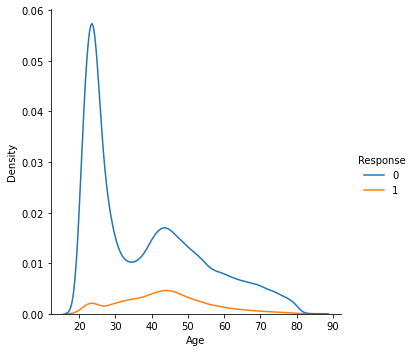

In [87]:
sns.displot(data=train,x='Age',kind='kde',hue='Response')

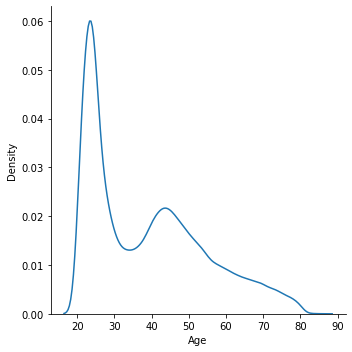

In [89]:
sns.displot(data=train,x='Age',kind='kde')

In [130]:
fitted_data,_=boxcox(train['Age'])
test_fitted_data,_=boxcox(test['Age'])
train.loc[:,'Age']=fitted_data
test.loc[:,'Age']=test_fitted_data

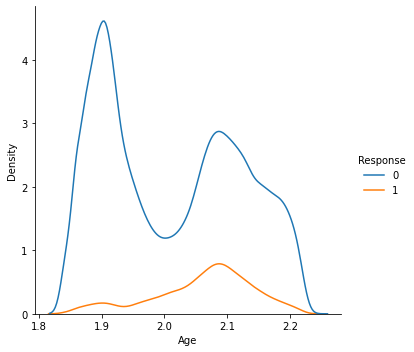

In [153]:
sns.displot(data=train,x='Age',kind='kde',hue='Response')

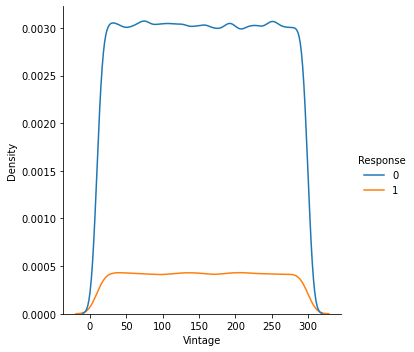

In [90]:
sns.displot(data=train,x='Vintage',kind='kde',hue='Response')

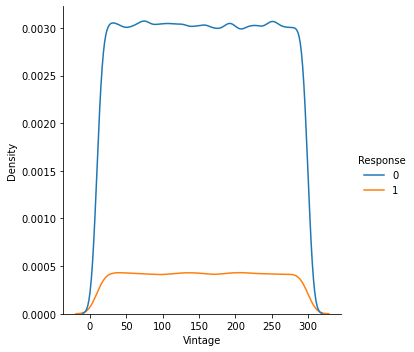

In [118]:
sns.displot(data=train,x='Vintage',kind='kde',hue="Response")

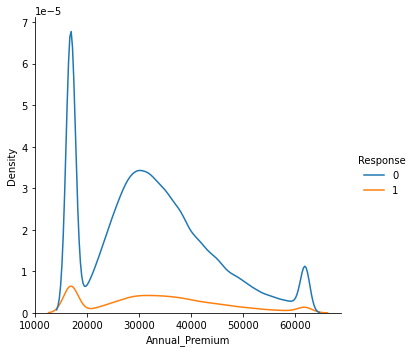

In [138]:
sns.displot(data=train,x='Annual_Premium',kind='kde',hue="Response")

In [141]:
train['Annual_Premium'].skew()

0.541868961955933

In [135]:
fitted_data,_=boxcox(train['Annual_Premium'])

In [143]:
fitted_data,_=boxcox(train['Annual_Premium'])
fitted_data=pd.DataFrame(fitted_data)

In [151]:
test_fitted_data,_=boxcox(test['Annual_Premium'])
train.loc[:,'Annual_Premium']=np.asarray(fitted_data)
test.loc[:,'Annual_Premium']=np.asarray(test_fitted_data)

<AxesSubplot:xlabel='Annual_Premium', ylabel='Density'>

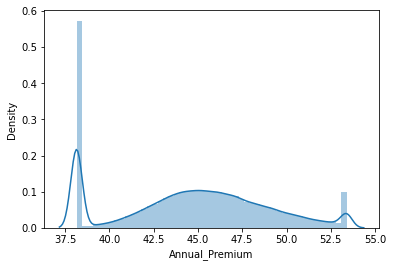

In [152]:
sns.distplot(train['Annual_Premium'])